# Association Rules - 360DIGITMG

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. ... In contrast with sequence mining, association rule learning typically does not consider the order of items either within a transaction or across transactions.

Apriori is part of the association rule learning algorithms, which sit under the unsupervised branch of Machine Learning.Apriori does not require us to provide a target variable for the model. Instead, the algorithm identifies relationships between data points subject to our specified constraints.

Support
The first step for us and the algorithm is to find frequently bought items. It is a straightforward calculation that is based on frequency.
Support(A) = Transactions(A) / Total Transactions

Confidence
Now that we have identified frequently bought items let’s calculate confidence. This will tell us how confident (based on our data) we can be that an item will be purchased, given that another item has been purchased.
Confidence(A→B) = Probability(A & B) / Support(A)

Lift
Given that different items are bought at different frequencies, how do we know that eggs and bacon really do have a strong association, and how do we measure it? You will be glad to hear that we have a way to evaluate this objectively using lift.
There are multiple ways to express the formula to calculate lift.
1) Lift(A→B) = Probability(A & B) / (Support(A) * Support(B))
2) Lift(A→B) = Confidence(A & B) / Support(B)

# Steps Involved in Apriori Algorithm
1. Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).
2. Extract all the subsets having higher value of support than minimum threshold.
3. Select all the rules from the subsets with confidence value higher than minimum threshold.
4. Order the rules by descending order of Lift.

# Association Rules Problem No. 3
A film distribution company wants to target audience based on their likes and dislikes, you as a Chief Data Scientist Analyze the data and come up with different rules of movie list so that the business objective is achieved.


In [ ]:
# Implementing Apriori algorithm from mlxtend

# conda install mlxtend
# or
# pip install mlxtend

In [1]:
import pandas as pd # for Data Manipulation
from mlxtend.frequent_patterns import apriori, association_rules # for Apriori algorithm we use mlxtend 
import matplotlib.pyplot as plt # Data Vizualization

In [8]:
#loading the book data set
my_movies =pd.read_csv("my_movies.csv") 
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
my_movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Deleting the unwanted columns
my_movies_x = my_movies.drop(['V1','V2','V3','V4','V5'],axis=1)
my_movies_x

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
# # Checking the Most Frequent item sets based on min support 
my_movies_y= apriori(my_movies_x, min_support = 0.0075, max_len = 4, use_colnames = True)
my_movies_y

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [6]:
# Most Frequent item sets based on support 
my_movies_y.sort_values('support', ascending = False, inplace = True)


<ipython-input-7-62671e4b002f>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0,9 )), height = my_movies_y.support[0:9], color ='rgmyk')


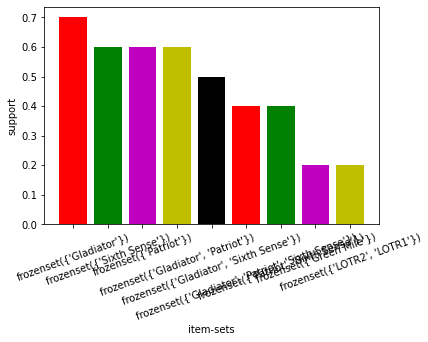

In [7]:
# now we ploting the bar plot for checking the support  with item sets 
plt.bar(x = list(range(0,9 )), height = my_movies_y.support[0:9], color ='rgmyk')
plt.xticks(list(range(0,9 )), my_movies_y.itemsets[0:9], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [ ]:
# If we are interested in rules according to a different metric of interest, we can simply adjust the metric 
# and min_threshold arguments .
# Eg.  if you are only interested in rules that have a lift score of >= 1, you would do the following
rules = association_rules(my_movies_y, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

In [ ]:
################################# Extra part ###################################
# arranging the 
def to_list(i):
    return (sorted(list(i)))

In [ ]:
# adding the antecedents and consequents  rules
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [ ]:
ma_X = ma_X.apply(sorted)

In [ ]:
rules_sets = list(ma_X)

In [ ]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [ ]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [ ]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

In [ ]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

In [ ]:
rules_no_redudancy.to_csv("my_moviesArules.csv",encoding="utf 8")

import os
os.getcwd()
